In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./hotel_bookings.csv')
hotel_df = df[['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
               'arrival_date_month', 'days_in_waiting_list', 'adr', 'adults', 
               'children', 'babies']]
print(hotel_df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   days_in_waiting_list   adr  adults  children  babies  
0                     0   0.0       2       0.0       0  
1                     0   0.0       2       0.0       0  
2                     0  75.0       1       0.0       0  
3                     0  75.0       1       0.0       0  
4                     0  98.0       2       0.0       0  


In [2]:
no_guest = hotel_df.adults + hotel_df.children + hotel_df.babies
no_guest[no_guest == 0.0].count()

180

In [3]:
hotel_not_canceled_df= hotel_df[hotel_df['is_canceled'] == 0]
guest_not_canceled = hotel_not_canceled_df.adults + hotel_not_canceled_df.children + hotel_not_canceled_df.babies
guest_not_canceled[guest_not_canceled==0.0].count()

155

In [5]:
df1 = hotel_not_canceled_df[(guest_not_canceled==0.0)]
indices = list(df1.index.values)
hotel_not_canceled_df.loc[indices, 'adults'] = 1
hotel_df.loc[indices, 'adults'] = 1
df1.adults

2224      1
2409      1
3181      1
3684      1
3708      1
         ..
115029    1
115091    1
116251    1
116534    1
117087    1
Name: adults, Length: 155, dtype: int64

In [6]:
hotel_not_canceled_df = hotel_df[hotel_df['is_canceled'] == 0]
max_lead_time_by_hotel = hotel_not_canceled_df.groupby('hotel')['lead_time'].max()

max_lead_time_by_hotel

hotel
City Hotel      518
Resort Hotel    737
Name: lead_time, dtype: int64

Hotel Type: City Hotel, Most common lead time interval: [5.18]
Hotel Type: Resort Hotel, Most common lead time interval: [7.37]


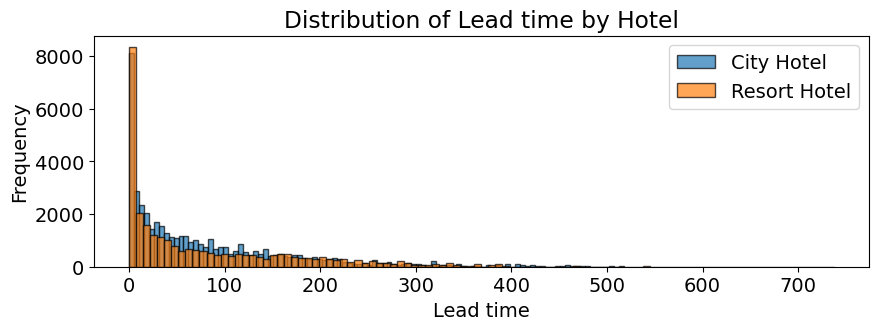

In [27]:
plt.figure(figsize=(10, 3))
plt.title("Distribution of Lead time by Hotel")
plt.xlabel("Lead time")
plt.ylabel("Frequency")

for hotel_type, data in hotel_not_canceled_df.groupby('hotel'):
    counts, bins, _ = plt.hist(data.lead_time, bins=100, edgecolor="black", alpha=0.7, label=hotel_type, zorder=3)

    most_common_bin_index = np.argmax(counts)
    most_common_bin_end = bins[most_common_bin_index + 1]

    print(f"Hotel Type: {hotel_type}, Most common lead time interval: [{most_common_bin_end}]")

plt.legend()
plt.rcParams['font.size'] = 14.0
plt.show()

In [29]:
hotel_not_canceled_df.loc[:, 'guests'] = hotel_not_canceled_df['adults'] + \
                                           hotel_not_canceled_df['children'] + \
                                           hotel_not_canceled_df['babies']

guests_per_year = hotel_not_canceled_df.groupby(['arrival_date_year', 'arrival_date_month']).agg({'guests': 'sum'})
print(guests_per_year)
print('total guests = ', guests_per_year.sum())

                                      guests
arrival_date_year arrival_date_month        
2015              August              4801.0
                  December            3693.0
                  July                3175.0
                  November            3028.0
                  October             5777.0
                  September           5498.0
2016              April               6447.0
                  August              7417.0
                  December            4817.0
                  February            4699.0
                  January             2902.0
                  July                6861.0
                  June                6128.0
                  March               6355.0
                  May                 6766.0
                  November            5010.0
                  October             6956.0
                  September           6577.0
2017              April               6391.0
                  August              6934.0
          

In [10]:
montly_data1 = hotel_not_canceled_df.groupby(['arrival_date_year', 'arrival_date_month']).agg({'guests': 'sum'})
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
montly_data2 = montly_data1.unstack(level=0).reindex(months, axis=0)
montly_data2

guests                
arrival_date_year     2015    2016    2017
arrival_date_month                        
January                NaN  2902.0  4291.0
February               NaN  4699.0  5343.0
March                  NaN  6355.0  5915.0
April                  NaN  6447.0  6391.0
May                    NaN  6766.0  6687.0
June                   NaN  6128.0  6401.0
July                3175.0  6861.0  7293.0
August              4801.0  7417.0  6934.0
September           5498.0  6577.0     NaN
October             5777.0  6956.0     NaN
November            3028.0  5010.0     NaN
December            3693.0  4817.0     NaN

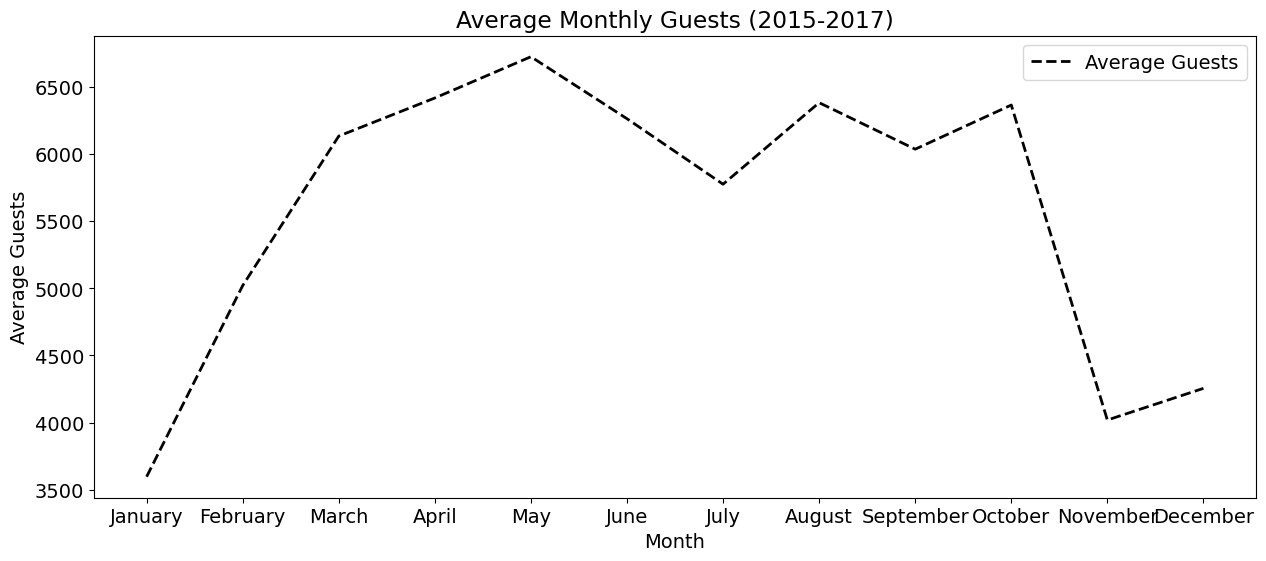

In [11]:
set_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September','October', 'November', 'December']

total_monthly_data = hotel_not_canceled_df.groupby(['arrival_date_year', 'arrival_date_month']).agg({'guests': 'sum'})
monthly_data = total_monthly_data.reset_index()
average_monthly_data = monthly_data.groupby('arrival_date_month')['guests'].mean()

plt.figure(figsize=(15, 6))
plt.plot(set_order, average_monthly_data[set_order], label='Average Guests', linewidth=2, linestyle='--', color='black')

plt.title('Average Monthly Guests (2015-2017)')
plt.xlabel('Month')
plt.ylabel('Average Guests')
plt.legend()
plt.show()

In [12]:
waiting_list = hotel_not_canceled_df.groupby(['arrival_date_month']).agg({'days_in_waiting_list': 'sum'}).reindex(set_order, axis=0)
waiting_list

,days_in_waiting_list
arrival_date_month,
January,4364
February,738
March,1811
April,12015
May,20115
June,4120
July,2488
August,3185
September,25967


In [13]:
adr1 = hotel_not_canceled_df.groupby(['arrival_date_year', 'arrival_date_month']).agg({'adr': 'mean' })
adr1_unstack = adr1.unstack(level=0).reindex(set_order, axis=0).round(2)
adr1_unstack['average'] = adr1_unstack.mean(axis=1).round(1)
adr1_unstack

adr                 average
arrival_date_year     2015    2016    2017        
arrival_date_month                                
January                NaN   61.75   70.65    66.2
February               NaN   68.79   75.71    72.2
March                  NaN   74.34   80.37    77.4
April                  NaN   86.48  109.88    98.2
May                    NaN   94.88  114.84   104.9
June                   NaN  104.25  124.89   114.6
July                109.60  126.81  140.46   125.6
August              114.29  144.16  160.41   139.6
September            98.33  115.29     NaN   106.8
October              79.49   93.25     NaN    86.4
November             58.75   78.24     NaN    68.5
December             71.25   84.98     NaN    78.1

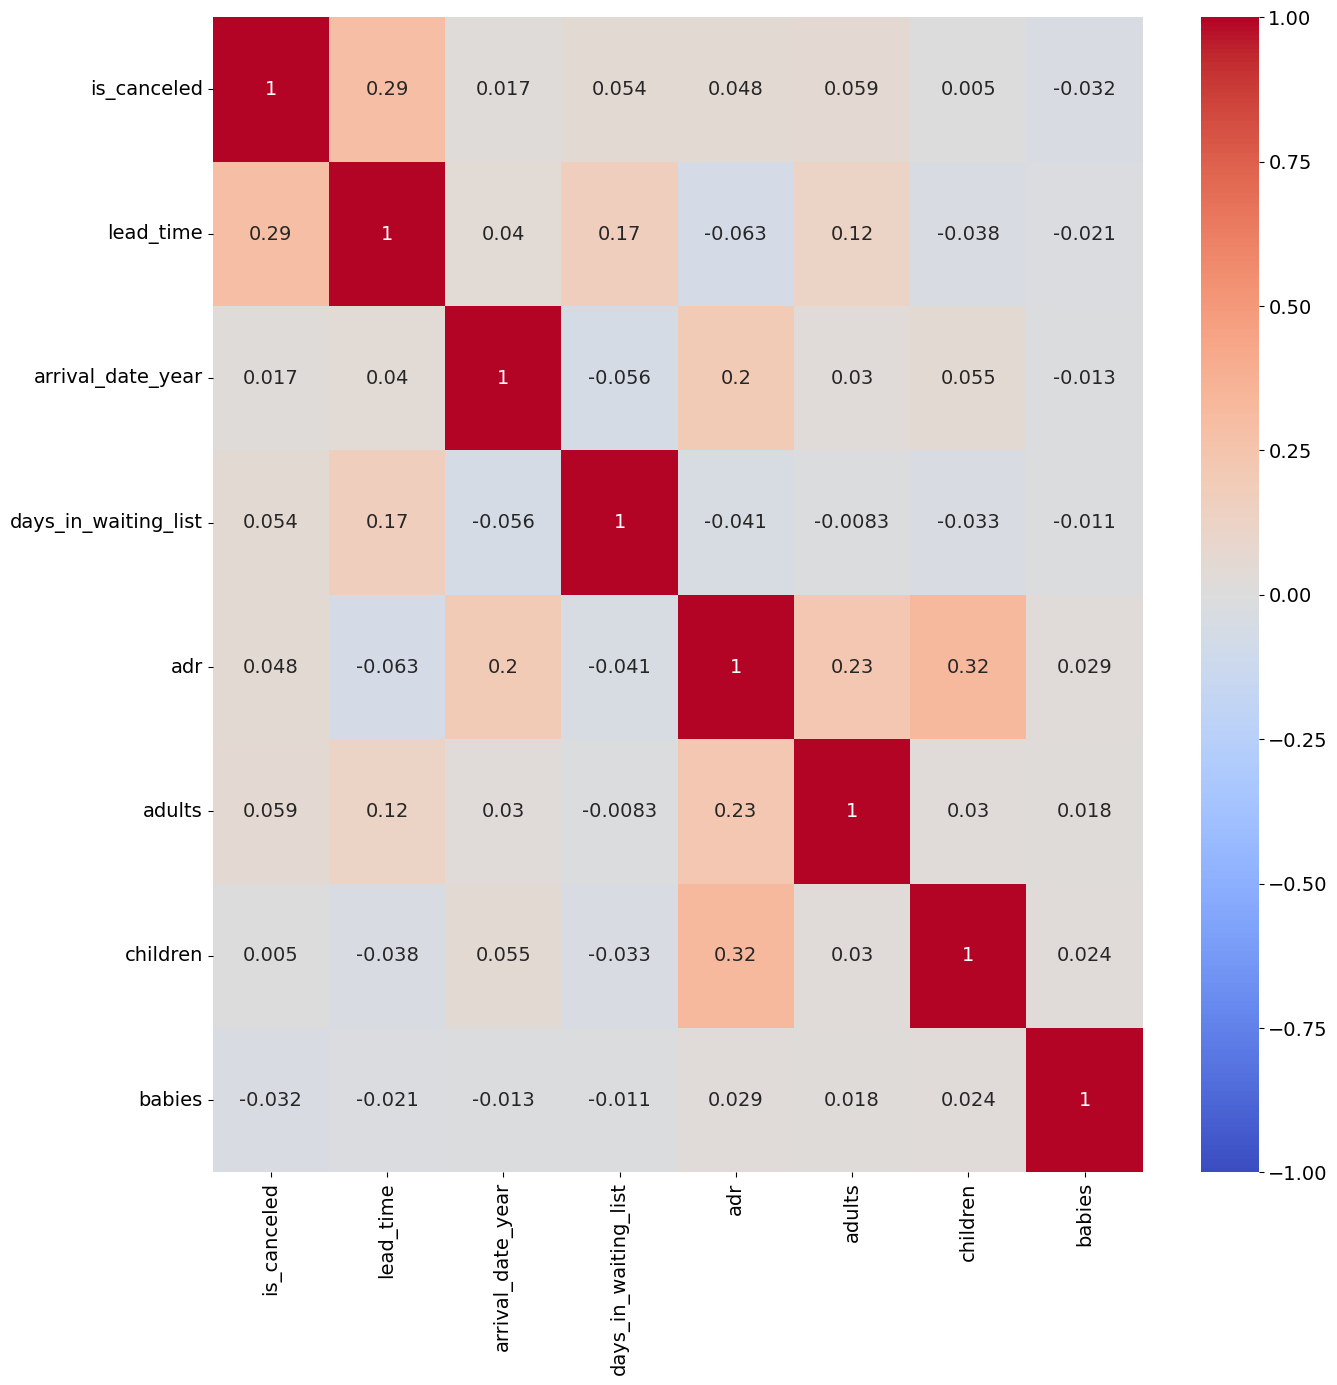

In [25]:
plt.figure(figsize=(15, 15))

numeric_columns = hotel_df.select_dtypes(include=['float64', 'int64']).columns
corr_df = hotel_df[numeric_columns]

sns.heatmap(corr_df.corr(), cmap='coolwarm', vmax=1, vmin=-1, annot=True)
plt.show()